# Download and import Libraries

In [ ]:
!pip install -q ultralytics
!pip install -q gdown

In [ ]:
import datetime
import os
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image
import cv2
import pandas as pd
import seaborn as sns

# Download Data

In [ ]:
def downloader(file_id: str, root_path: str, file_name: str = 'data'):
    # Create data folder if not exist
    if not os.path.isdir(root_path):
        os.mkdir(root_path)
    # Clear data folder
    os.system(f'rm -rf {root_path}/*')
    # Download data
    !gdown {file_id} --output {root_path}/{file_name}.zip
    # Unzip data
    !unzip -q {root_path}/{file_name}.zip -d {root_path}
    # rename folder unzip as file_name
#     os.rename(f'{root_path}/data', f'{root_path}/{save_file_name}')

In [ ]:
# Data constants
x = datetime.datetime.now()
datetime_now = x.strftime("%Y%m%d%H%M%S")
who_train = "huydn" #@param {type: 'string'}
download_data_id = "1SVKZPvaYo9lpa-qCaqF8M89RQunOrrJz" #@param {type: 'string'}
root_path = '/kaggle/working/data'
save_file_name = f'{datetime_now}_{who_train}_data'
save_file_name_test = f'{datetime_now}_{who_train}_test_data'

In [ ]:
downloader(file_id=download_data_id, root_path=root_path, file_name=save_file_name)

Downloading...
From (original): https://drive.google.com/uc?id=1SVKZPvaYo9lpa-qCaqF8M89RQunOrrJz
From (redirected): https://drive.google.com/uc?id=1SVKZPvaYo9lpa-qCaqF8M89RQunOrrJz&confirm=t&uuid=2446038f-9e49-4d6e-b9cd-00ffa13e028e
To: /kaggle/working/data/20240708152126_huydn_data.zip
100%|█████████████████████████████████████████| 306M/306M [00:02<00:00, 113MB/s]


In [ ]:
os.rename(f'{root_path}/data2', f'{root_path}/{save_file_name}')

# Check Dataset

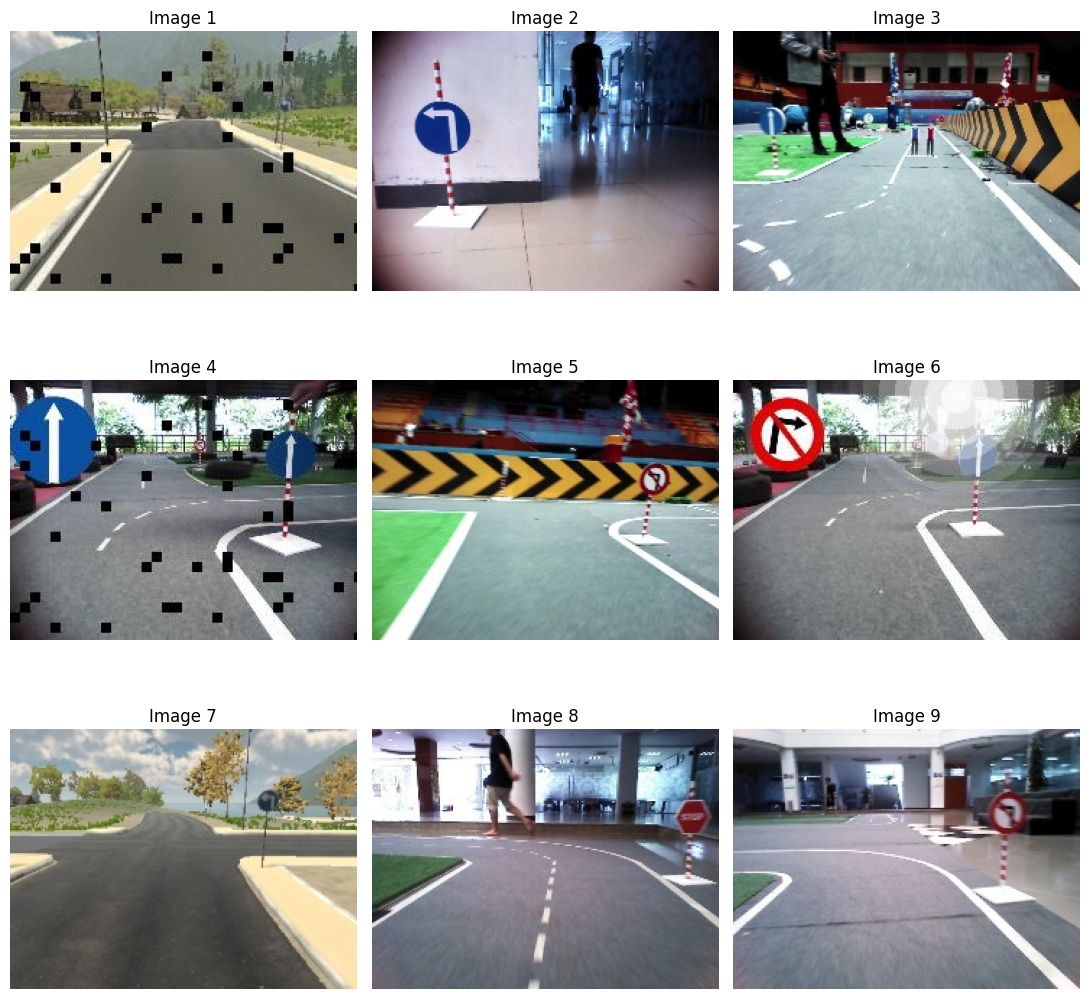

In [ ]:
Image_dir = f'{root_path}/{save_file_name}/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# create dataset.yaml file
!touch {root_path}/{save_file_name}.yaml
!echo "train: {root_path}/{save_file_name}/train/images" >> {root_path}/{save_file_name}.yaml
!echo "val: {root_path}/{save_file_name}/val/images" >> {root_path}/{save_file_name}.yaml
!echo "nc: 6" >> {root_path}/{save_file_name}.yaml
!echo "names: ['straight', 'right', 'left', 'stop', 'no_left', 'no_right']" >> {root_path}/{save_file_name}.yaml


# Model

In [ ]:
from ultralytics import settings
os.environ['WANDB_MODE'] = 'disabled'
settings.update({"wandb": False})

In [ ]:
# Load a pre-trained YOLOv10n model
yolo_model = YOLO("yolov10m.pt")

# Train the model
yolo_model.train(data=f"{root_path}/{save_file_name}.yaml", epochs=30)

100%|██████████| 32.1M/32.1M [00:00<00:00, 226MB/s]


Ultralytics YOLOv8.2.51 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov10m.pt, data=/kaggle/working/data/20240708152126_huydn_data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

100%|██████████| 755k/755k [00:00<00:00, 26.3MB/s]
2024-07-08 15:21:48,568	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-08 15:21:49,491	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1     78720  ultralytics.nn.modules.block.SCDown          [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1    228672  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 105MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/data/20240708152126_huydn_data/train/labels... 22886 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22886/22886 [00:17<00:00, 1343.31it/s]


train: New cache created: /kaggle/working/data/20240708152126_huydn_data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/data/20240708152126_huydn_data/val/labels... 587 images, 1 backgrounds, 0 corrupt: 100%|██████████| 588/588 [00:00<00:00, 1323.57it/s]

val: New cache created: /kaggle/working/data/20240708152126_huydn_data/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      10.3G       2.36      3.067      2.141          9        640: 100%|██████████| 1431/1431 [17:01<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.29it/s]

                   all        588       1279      0.668      0.768      0.789      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      10.2G       2.22      1.295       2.11         11        640: 100%|██████████| 1431/1431 [16:42<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.67it/s]

                   all        588       1279      0.728      0.704      0.734      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      10.2G      2.287      1.347       2.14         15        640: 100%|██████████| 1431/1431 [16:35<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.66it/s]

                   all        588       1279      0.805      0.755      0.824      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      10.1G      2.263      1.298      2.137          7        640: 100%|██████████| 1431/1431 [16:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.65it/s]

                   all        588       1279       0.75      0.765      0.771      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      10.1G       2.17      1.138       2.09         13        640: 100%|██████████| 1431/1431 [16:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.67it/s]

                   all        588       1279      0.756      0.763      0.791      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      10.2G      2.104      1.047      2.062         14        640: 100%|██████████| 1431/1431 [16:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.64it/s]

                   all        588       1279      0.744      0.757      0.781      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      10.2G      2.074      1.003      2.038          6        640: 100%|██████████| 1431/1431 [16:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.65it/s]

                   all        588       1279       0.78      0.797      0.806        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      10.1G      2.021       0.94      2.024         16        640: 100%|██████████| 1431/1431 [16:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.66it/s]

                   all        588       1279        0.7      0.684      0.739      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      10.1G      2.007     0.9103      2.012         15        640: 100%|██████████| 1431/1431 [16:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.67it/s]

                   all        588       1279      0.648      0.723      0.696      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      10.2G      1.979      0.872      1.994         16        640: 100%|██████████| 1431/1431 [16:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.64it/s]

                   all        588       1279       0.74      0.753      0.773      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      10.3G      1.956     0.8559      1.984          8        640: 100%|██████████| 1431/1431 [16:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.61it/s]

                   all        588       1279      0.726      0.759      0.762       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      10.1G      1.947      0.821      1.982         16        640: 100%|██████████| 1431/1431 [16:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.64it/s]

                   all        588       1279      0.701      0.741      0.725      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      10.2G      1.925      0.815      1.973         14        640: 100%|██████████| 1431/1431 [16:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all        588       1279      0.765      0.739      0.772      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      10.1G      1.901     0.7859      1.962         14        640: 100%|██████████| 1431/1431 [16:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all        588       1279      0.748      0.749      0.777      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      10.2G      1.895     0.7798      1.956         11        640: 100%|██████████| 1431/1431 [16:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]


                   all        588       1279      0.768      0.777      0.806      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      10.1G      1.864     0.7615      1.949         14        640: 100%|██████████| 1431/1431 [16:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.66it/s]

                   all        588       1279      0.737      0.706      0.737      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      10.2G      1.853     0.7378      1.941         11        640: 100%|██████████| 1431/1431 [16:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.66it/s]

                   all        588       1279      0.745       0.72      0.757      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      10.1G      1.837      0.726       1.93         11        640: 100%|██████████| 1431/1431 [16:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all        588       1279      0.745      0.728       0.77      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      10.2G      1.818     0.7174      1.923          9        640: 100%|██████████| 1431/1431 [16:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.61it/s]

                   all        588       1279      0.743       0.71      0.755      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30        10G      1.802     0.6996      1.919         14        640: 100%|██████████| 1431/1431 [16:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.66it/s]

                   all        588       1279      0.766      0.741      0.775      0.483


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      10.2G      1.796     0.6363      1.962         12        640: 100%|██████████| 1431/1431 [16:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all        588       1279      0.734      0.711      0.744      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      10.2G       1.78     0.6247      1.962          6        640: 100%|██████████| 1431/1431 [16:31<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.67it/s]

                   all        588       1279      0.712       0.69       0.71      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      10.1G      1.762     0.6098       1.95          6        640: 100%|██████████| 1431/1431 [16:31<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.69it/s]


                   all        588       1279      0.751      0.686       0.73      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30        10G      1.743      0.595      1.942          5        640: 100%|██████████| 1431/1431 [16:31<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.69it/s]

                   all        588       1279      0.756      0.673      0.739      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      10.3G      1.725     0.5805      1.927          8        640: 100%|██████████| 1431/1431 [16:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.69it/s]

                   all        588       1279      0.724      0.684      0.716      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      10.1G      1.697     0.5672      1.916          7        640: 100%|██████████| 1431/1431 [16:31<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all        588       1279       0.76      0.632       0.71      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      10.2G      1.679     0.5571      1.908          6        640: 100%|██████████| 1431/1431 [16:31<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all        588       1279      0.763      0.678      0.739      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      10.1G      1.662     0.5431      1.904          7        640: 100%|██████████| 1431/1431 [16:31<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.69it/s]

                   all        588       1279      0.757      0.696      0.751      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      10.1G      1.636     0.5304      1.897          8        640: 100%|██████████| 1431/1431 [16:31<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all        588       1279      0.672      0.777      0.752      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      10.2G      1.616     0.5181      1.885          7        640: 100%|██████████| 1431/1431 [16:31<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.69it/s]

                   all        588       1279       0.66      0.758      0.738      0.467



30 epochs completed in 8.365 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 33.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.51 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv10m summary (fused): 369 layers, 16457332 parameters, 0 gradients, 63.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.27it/s]


                   all        588       1279      0.768      0.777      0.806      0.501
              straight        177        177      0.895      0.898      0.928      0.611
                 right        176        177       0.49      0.627      0.461      0.268
                  left        250        251      0.777      0.597      0.791      0.441
                  stop        202        202      0.912      0.936      0.951      0.588
               no_left        202        205      0.715       0.79      0.816      0.542
              no_right        266        267      0.816      0.816       0.89      0.554
Speed: 0.1ms preprocess, 9.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79d862f78d90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [ ]:
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))
download_file('/kaggle/working/runs', 'yolo_trained')

/kaggle/working/yolo_trained.zip

# Validate

In [ ]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

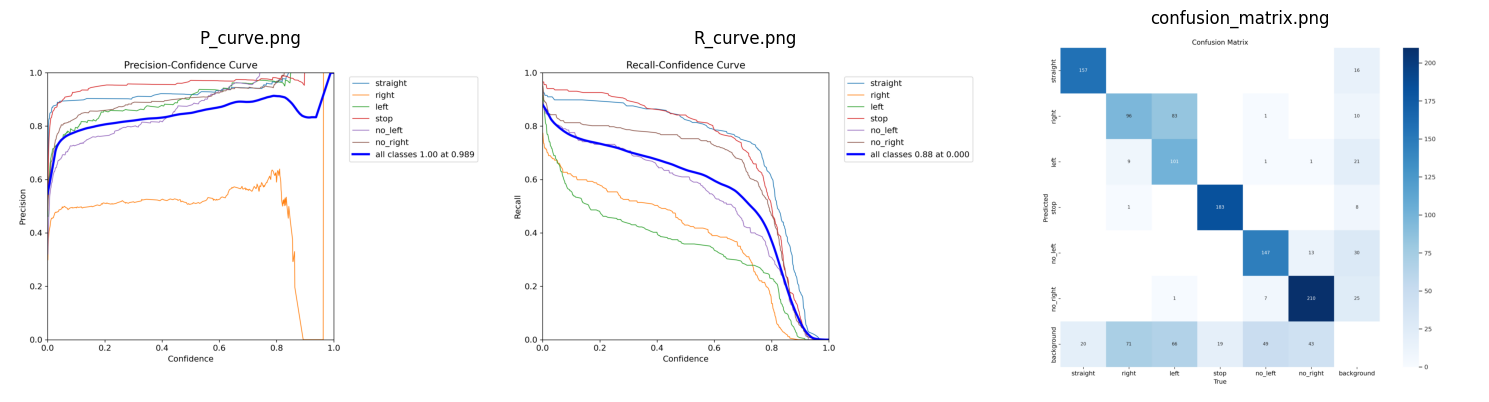

In [ ]:
# plot list_of_metrics in subplot

fig, axes = plt.subplots(1, len(list_of_metrics), figsize=(15, 15))

for i, metric in enumerate(list_of_metrics):
    ax = axes[i]
    ax.set_title(metric)
    ax.axis('off')
    ax.imshow(plt.imread(f"/kaggle/working/runs/detect/train/{metric}"))

plt.tight_layout()
plt.show()


In [ ]:
Result_Final_model = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
Result_Final_model.tail(10)

df = Result_Final_model

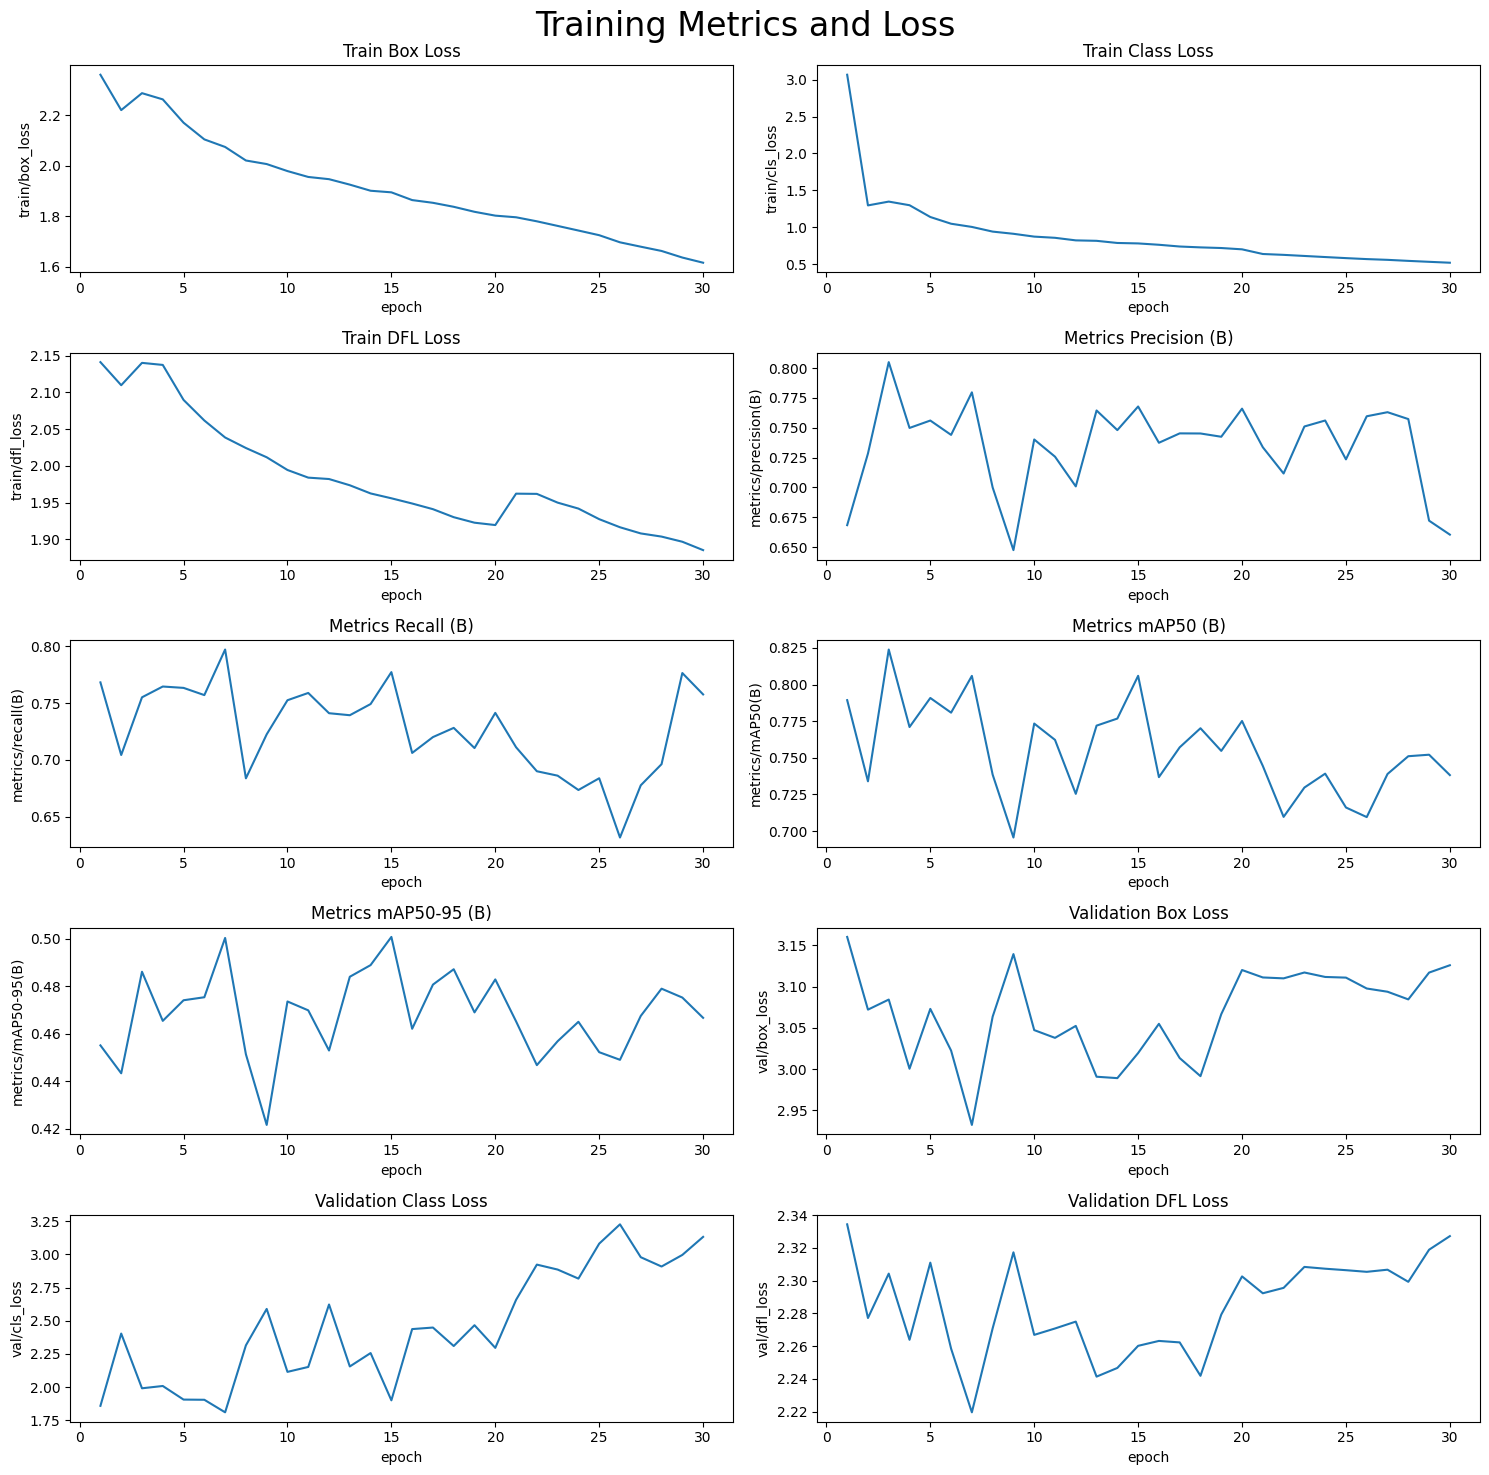

In [ ]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = df.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()